# Importar librerías

In [2]:
# Install libraries
!pip install plotly 

# Import matplotlib
import matplotlib.pyplot as plt

# Import pandas 
import pandas as pd

# Import seaborn
import seaborn as sns

import plotly.graph_objects as go

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

/home/alina/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/alina/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


# Primera parte

En esta sección utilizaremos datos de distintas fuentes, que listamos a continuación para graficar tendencias, porcentajes y relaciones. 
- Penetración de internet [International Telecommunication Union (ITU)](https://www.itu.int/en/Pages/default.aspx) y [Economist Intelligence Unit (EIU)](https://www.eiu.com/n/)
- Internet shutdowns: [Acess Now](https://www.accessnow.org/)

Muchos datos están agrupados por regiones, lo cual es un trabajo previo y no se hará aquí, los datos que utilizamos ya están previamente procesados. 

## Penetración de internet

Con la función plot graficamos las tendencias desde 2000 a 2020 de la penetración de internet en las regiones consideradas.

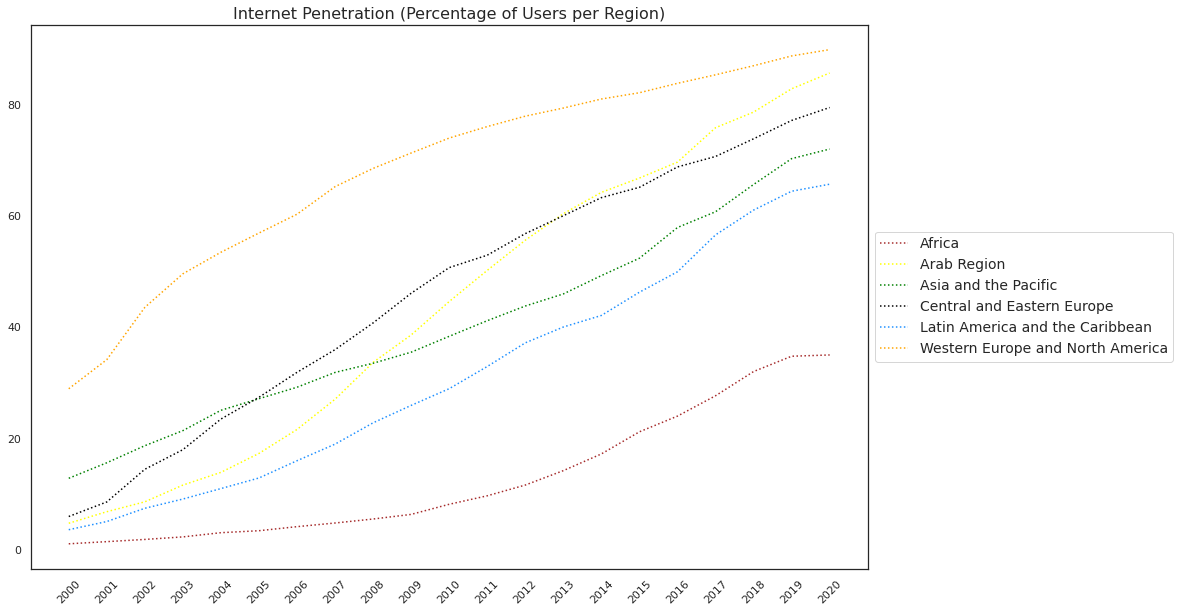

In [18]:
df = pd.read_csv('./data/Internet_access.csv')

colors = {'Africa':'brown',
          'Asia and the Pacific':'green',
          'Western Europe and North America': 'orange',
          'Central and Eastern Europe': 'black',
          'Latin America and the Caribbean': 'dodgerblue',
          'Arab Region': 'yellow'}
plt.figure(figsize=(15,10))

df_plot = df.groupby('Region').mean().transpose().reset_index()
df_plot['index'] = df_plot['index'].astype('int')
df_plot.set_index('index',inplace=True)
line = {}
for col in df_plot.columns:
    plt.plot(df_plot.loc[:,col],ls=':',color=colors[col])
#    plt.plot(df_plot.loc[2016:,col],ls='-',color=colors[col])
# # .plot(
#     figsize=(15,10), 
#     grid=True,
#     xlabel="",
#     ylabel = "%",
#     color=colors,
#     style="-.",
plt.legend(df_plot.columns,fontsize=14,loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.title("Internet Penetration (Percentage of Users per Region)",fontsize=16)
plt.xticks(list(range(2000,2021)),list(range(2000,2021)),rotation=45)
#plt.savefig('graphs_compilation/P_3.png',format='png')
plt.show()

## Apagones de internet 

Loa apagones de internet son, por muchas razones un atentado a la democracia y derechos humanos. En esta gráfica vemos la tendencia de 2016 a 2021 del total de apagones de internet globalmente. 

[-10.   0.  10.  20.  30.  40.  50.  60.  70.]


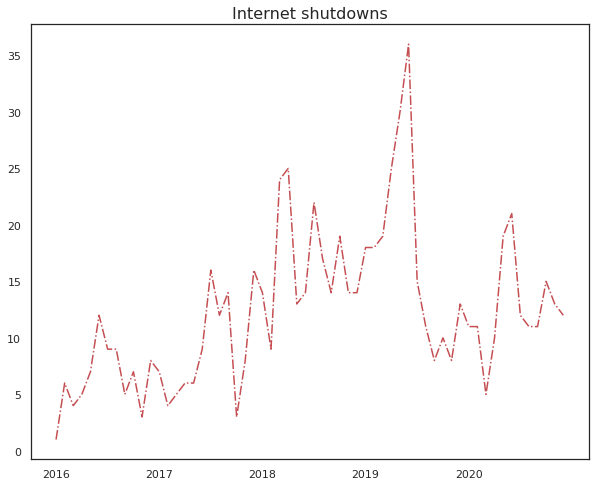

In [22]:
data_to_plot = pd.read_csv('./data/trends_globales_internet_shutdowns.csv')
ax=data_to_plot['0'].plot(figsize=(10,8),color='r',linestyle='-.')
#ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
print(ax.get_xticks())
plt.xticks([0,12,24,36,48],list(range(2016,2021)))
plt.title('Internet shutdowns',fontsize=16)
plt.show()

## Apagones de internet por región 

En este caso se usa la función barplot de seaborn para graficar la cantidad de apagones totales para cada región, sumando todos en el tiempo. 

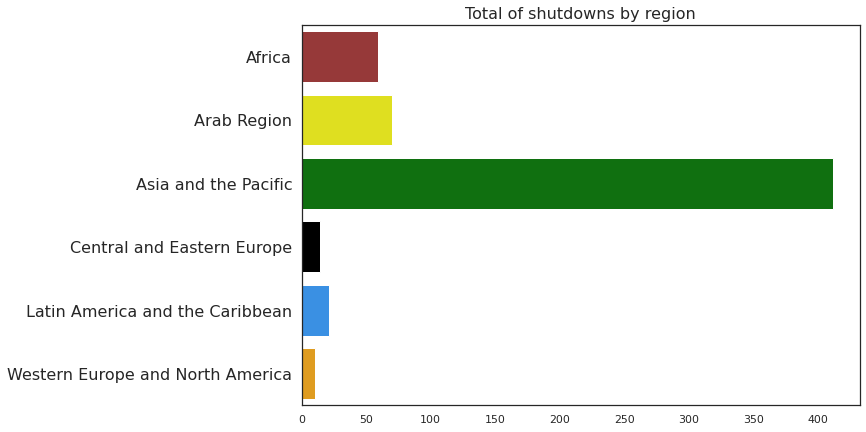

In [23]:
colors = {'Africa':'brown',
          'Asia and the Pacific':'green',
          'Western Europe and North America': 'orange',
          'Central and Eastern Europe': 'black',
          'Latin America and the Caribbean': 'dodgerblue',
          'Arab Region': 'yellow'}

df_year_country = pd.read_csv('./data/trends_regiones_internet_shutdowns.csv')

fig = plt.figure(figsize=(10,7))
df_region = df_year_country.groupby(['Region']).sum().reset_index()
sns.barplot(y=df_region['Region'],x=df_region['total'],data=df_region,palette=colors)
#plt.legend(fontsize=15)
plt.yticks(fontsize=16)
plt.title('Total of shutdowns by region', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

## Reasons

Las circunstancias en las que generalmente se ordenan los apagones revelan que los gobiernos realmente los despliega como una táctica para restringir los derechos de la ciudadanía a la libertad de expresión e información, y para interferir con el derecho a la libertad de reunión y asociación, particularmente durante eventos como las elecciones, conflictos o manifestaciones masivas. Sin embargo, el gobierno usualmente da una explicación oficial. A continuación se grafican las razones de dadas por el gobierno, y las reales, tomadas del contexto y opiniones de expertos. El flujo de una razón de la izquierda (las oficiales) hacia una de la derecha (las reales) representa la cantidad de veces que se dijo una siendo la otra. 

In [24]:
df_by_reasons = pd.read_csv('./data/razones_internet_shutdowns.csv')
len_source = []
actual_causes = []
for just in df_by_reasons['official_just'].unique():
    cause = df_by_reasons[df_by_reasons['official_just']==just]['actual_cause']
    len_source.append(len(cause))
    actual_causes += cause.to_list() 
    
label = list(df_by_reasons['official_just'].unique()) + list(df_by_reasons['actual_cause'].unique())
source = []
target = []
for i in range(len(len_source)): 
    source += [i]*int(len_source[i])
for i in range(len(source)):
    target += [label.index(actual_causes[i])]     
values = df_by_reasons['total'].to_list()    
target_unique = list(set(target))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
dic_colors = dict(zip(target_unique,colors))
color_link = [dic_colors[link] for link in target]

link = dict(source=source,target=target,value=values,color=color_link)
node = dict(label=label)
data = go.Sankey(link=link,node=node)
fig = go.Figure(data)
fig.update_layout(    title={
        'text': 'Justifications for internet shutdowns and their underlying motivations (2016 - 2020)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# Segunda parte: Seaborn

Este conjunto de datos de muestra de IBM contiene información sobre los clientes de Telco y sobre si han abandonado la empresa en el último mes (churn). Cada fila representa un único cliente, mientras que las columnas contienen información sobre los servicios del cliente, la cuenta y los datos demográficos. Utilizaremos Python y la biblioteca Seaborn para trazar y analizar los datos.

Información básica:

- Sólo 7043 filas
- Hay 21 columnas con 19 características
- Sólo faltan 11 valores

In [25]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Imputar los valores perdidos

In [26]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

## Variable objetivo

Porcentaje de clientes que han dejado la compañía

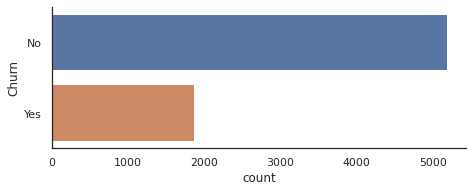

In [27]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

## Variables continuas

Sólo hay tres columnas numéricas: tenencia, gastos mensuales y gastos totales. La distribución de la densidad de probabilidad puede estimarse mediante la función kdeplot de seaborn.

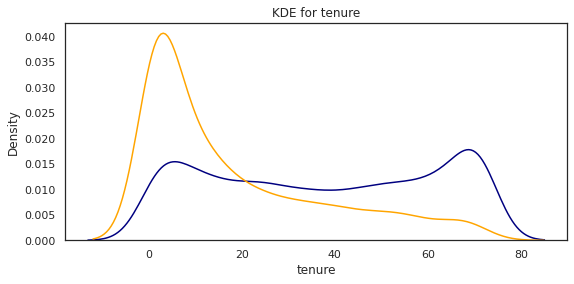

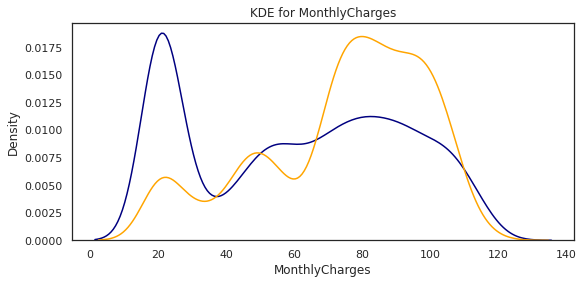

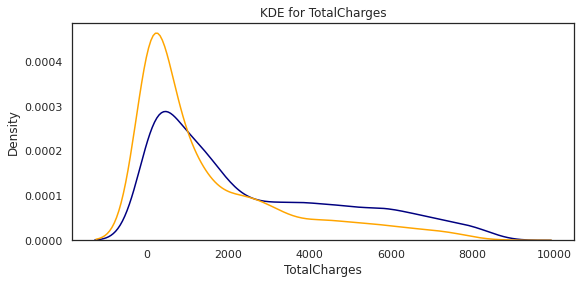

In [28]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

De los gráficos anteriores podemos concluir que:

- Los clientes recientes tienen más probabilidades de cambiar de proveedor
- Los clientes con tarifas mensuales más altas también tienen más probabilidades de cambiar de proveedor.
- La permanencia y los gastos mensuales son probablemente características importantes.


## Variables categóricas

Este conjunto de datos tiene 16 variables categóricas:

- Seis variables binarias (Sí/No)
- Nueve variables con tres valores únicos cada una (categorías)
- Una variable con cuatro valores únicos

A continuación se utiliza la función barplot para obtener información sobre la variable respuesta entre personas mayores específicamente. Y las diferencias en género y grupos de edad (si la persona es o no mayor de cierta edad que se clasifica como "SeniorCitizen") 

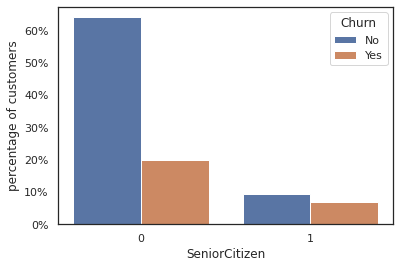

In [29]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

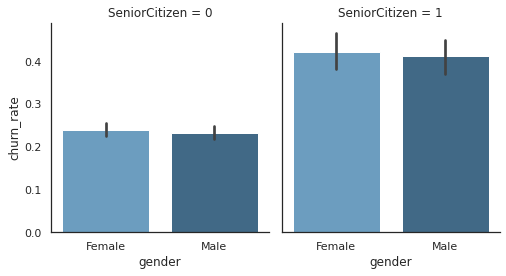

In [30]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

# Recursos

- [A Complete Guide to Data Visualization in Python With Libraries, Chart, Graphs & More](https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python#:~:text=Matplotlib%20and%20Seaborn%20are%20python,primarily%20used%20for%20statistical%20graphs.)
- [An Intuitive Guide to Data Visualization in Python](https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/)
- [Tutorial de Seaborn](https://seaborn.pydata.org/)